<a href="https://colab.research.google.com/github/mariannemn/generali/blob/main/Calculs_creation_bases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairies



In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
!pip install mapclassify 
!apt install requests
!apt install json
# Install mapclassify
!pip install mapclassify

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import geopandas as gpd #Gestion données sptiales
import os
import numpy as np
import shapely
import contextily as ctx #Fond de carte
import mapclassify # Cartographie thémtique
import pygeos
import requests
import json
import gdal

# Importation des données

## Téléchargement parcelle

In [ ]:
!wget https://cadastre.data.gouv.fr/data/etalab-cadastre/2021-02-01/shp/departements/35/cadastre-35-parcelles-shp.zip -O parcelles.zip

--2021-04-22 14:01:12--  https://cadastre.data.gouv.fr/data/etalab-cadastre/2021-02-01/shp/departements/35/cadastre-35-parcelles-shp.zip
Resolving cadastre.data.gouv.fr (cadastre.data.gouv.fr)... 54.36.212.78
Connecting to cadastre.data.gouv.fr (cadastre.data.gouv.fr)|54.36.212.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 285932770 (273M) [application/zip]
Saving to: ‘parcelles.zip’

parcelles.zip       100%[===================>] 272.69M  30.9MB/s    in 9.3s    

2021-04-22 14:01:21 (29.3 MB/s) - ‘parcelles.zip’ saved [285932770/285932770]



## Import des parcelles

In [ ]:
Parcelles = gpd.read_file("parcelles_nordest.shp", encoding='utf-8')
Parcelles.head()

,id,commune,prefixe,section,numero,contenance,created,updated,geometry
0,35238000AB0313,35238,000,AB,313,16380,2002-06-17,2019-12-13,"POLYGON ((352018.583 6789835.134, 351983.507 6..."
1,35238000AB0297,35238,000,AB,297,13690,2002-06-17,2019-12-13,"POLYGON ((352092.401 6790175.755, 352094.140 6..."
2,35238000AB0296,35238,000,AB,296,9430,2002-06-17,2019-12-13,"POLYGON ((352223.378 6790285.603, 352222.272 6..."
3,35238000AB0834,35238,000,AB,834,5556,2002-06-17,2019-12-13,"POLYGON ((351930.377 6790271.634, 351934.658 6..."
4,35238000AB0942,35238,000,AB,942,2108,2012-02-13,2019-12-13,"POLYGON ((352074.960 6790171.512, 352097.138 6..."


## Import BD Topo

In [ ]:
bd_topo = gpd.read_file("bdtopo_nordest.shp", encoding='utf-8')
bd_topo.head(5)

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,PREC_PLANI,PREC_ALTI,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,gml_id,objectid,code_insee,nom,commune_ag,x_centrbrg,y_centrbrg,code_posta,PNT_COUNT,geometry
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,Non,En service,2012-03-13 15:53:17,2020-05-29 13:38:56,None,None,None,None,3.0,1.0,0,1,04,09,2.7,38.5,41.2,0.0,42.0,Cadastre,A 0.5,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,5.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352..."
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:51:51,None,None,None,None,3.0,2.5,0,0,None,None,5.8,46.5,52.3,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,31.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354..."
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,Non,En service,2012-03-13 16:12:16,2019-03-27 07:22:02,2010-01-01,None,None,None,3.0,9999.0,27,5,00,00,0.0,45.1,0.0,0.0,0.0,Cadastre,C 0.1,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,13.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ..."
3,BATIMENT0000000297133874,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353593.600 6791436.300 -1000.000, ..."
4,BATIMENT0000000297133876,Indifférenciée,Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353598.700 6791431.000 -1000.000, ..."


## Import DVF

In [ ]:
dvf = pd.read_csv("35.csv", sep=',')
dvf.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,11,NaN,28.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,65.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755
1,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755
2,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,29,56.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,61.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755


##Import Quartier Prioritaire

In [ ]:
QUARTIER_PRIO = gpd.read_file("QP_METROPOLE_LB93.shp", encoding='utf-8')
QUARTIER_PRIO.head(5)

,CODE_QP,NOM_QP,COMMUNE_QP,geometry
0,QP044012,Le Ranzay,Nantes,"POLYGON ((357455.157 6692832.812, 357455.351 6..."
1,QP033010,Grand-Parc,Bordeaux,"POLYGON ((416890.442 6423848.428, 416894.521 6..."
2,QP066007,Bas-Vernet Nouveau QPV,Perpignan,"POLYGON ((691840.400 6178736.600, 691835.200 6..."
3,QP059019,Quartier Intercommunal Sous-Le Bois Montplaisi...,"Maubeuge, Hautmont, Louvroil, Neuf-Mesnil","POLYGON ((768301.360 7019918.257, 768288.481 7..."
4,QP030016,Centre Ville - Arboux,La Grand-Combe,"POLYGON ((782656.861 6346118.916, 782655.011 6..."


#Reprojection

In [ ]:
Parcelles = Parcelles.to_crs(2154) 
bd_topo = bd_topo.to_crs(2154) 
QUARTIER_PRIO = QUARTIER_PRIO.to_crs(2154) 

# Calcul des centiles - BD Topo

## **OUI ou NON pour dire si c'est dans les 1er ou dernier centile**

## Nombre de logements

In [ ]:
# Premier centile

# creation d'un champ égal à 0
bd_topo['min_nblogts_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non 
for row, value in bd_topo["NB_LOGTS"].items(): 
  if value <= bd_topo["NB_LOGTS"].quantile(0.01) : 
    bd_topo['min_nblogts_gcl'][row] = 'oui' 
  else: 
    bd_topo['min_nblogts_gcl'][row] = 'non'

bd_topo.head(6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Interactiv

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,PREC_PLANI,PREC_ALTI,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,gml_id,objectid,code_insee,nom,commune_ag,x_centrbrg,y_centrbrg,code_posta,PNT_COUNT,geometry,min_nblogts_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,Non,En service,2012-03-13 15:53:17,2020-05-29 13:38:56,None,None,None,None,3.0,1.0,0,1,04,09,2.7,38.5,41.2,0.0,42.0,Cadastre,A 0.5,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,5.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:51:51,None,None,None,None,3.0,2.5,0,0,None,None,5.8,46.5,52.3,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,31.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,Non,En service,2012-03-13 16:12:16,2019-03-27 07:22:02,2010-01-01,None,None,None,3.0,9999.0,27,5,00,00,0.0,45.1,0.0,0.0,0.0,Cadastre,C 0.1,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,13.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non
3,BATIMENT0000000297133874,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353593.600 6791436.300 -1000.000, ...",oui
4,BATIMENT0000000297133876,Indifférenciée,Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353598.700 6791431.000 -1000.000, ...",oui
5,BATIMENT0000000297130031,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:14:56,None,None,None,None,2.5,1.5,0,0,None,None,5.1,51.8,0.0,0.0,0.0,Imagerie aérienne,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((354226.800 6790765.300 56.900, 354...",oui


In [ ]:
# Dernier centile

# creation d'un champ égal à 0
bd_topo['max_nblogts_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non
for row, value in bd_topo["NB_LOGTS"].items(): 
  if value >= bd_topo["NB_LOGTS"].quantile(0.99) : 
    bd_topo['max_nblogts_gcl'][row] = 'oui'
  else: 
    bd_topo['max_nblogts_gcl'][row] = 'non'

bd_topo.head(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,PREC_PLANI,PREC_ALTI,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,gml_id,objectid,code_insee,nom,commune_ag,x_centrbrg,y_centrbrg,code_posta,PNT_COUNT,geometry,min_nblogts_gcl,max_nblogts_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,Non,En service,2012-03-13 15:53:17,2020-05-29 13:38:56,None,None,None,None,3.0,1.0,0,1,04,09,2.7,38.5,41.2,0.0,42.0,Cadastre,A 0.5,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,5.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui,non
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:51:51,None,None,None,None,3.0,2.5,0,0,None,None,5.8,46.5,52.3,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,31.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui,non
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,Non,En service,2012-03-13 16:12:16,2019-03-27 07:22:02,2010-01-01,None,None,None,3.0,9999.0,27,5,00,00,0.0,45.1,0.0,0.0,0.0,Cadastre,C 0.1,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,13.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non,non
3,BATIMENT0000000297133874,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353593.600 6791436.300 -1000.000, ...",oui,non
4,BATIMENT0000000297133876,Indifférenciée,Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353598.700 6791431.000 -1000.000, ...",oui,non
5,BATIMENT0000000297130031,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:14:56,None,None,None,None,2.5,1.5,0,0,None,None,5.1,51.8,0.0,0.0,0.0,Imagerie aérienne,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((354226.800 6790765.300 56.900, 354...",oui,non


## Nombre d'étages

In [ ]:
# Premier centile

# creation d'un champ égal à 0
bd_topo['min_etage_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non
for row, value in bd_topo["NB_ETAGES"].items(): 
  if value <= bd_topo["NB_ETAGES"].quantile(0.01) : 
    bd_topo['min_etage_gcl'][row] = 'oui' 
  else: 
    bd_topo['min_etage_gcl'][row] = 'non'

bd_topo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,PREC_PLANI,PREC_ALTI,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,gml_id,objectid,code_insee,nom,commune_ag,x_centrbrg,y_centrbrg,code_posta,PNT_COUNT,geometry,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,Non,En service,2012-03-13 15:53:17,2020-05-29 13:38:56,None,None,None,None,3.0,1.0,0,1,04,09,2.7,38.5,41.2,0.0,42.0,Cadastre,A 0.5,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,5.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui,non,non
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:51:51,None,None,None,None,3.0,2.5,0,0,None,None,5.8,46.5,52.3,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,31.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui,non,oui
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,Non,En service,2012-03-13 16:12:16,2019-03-27 07:22:02,2010-01-01,None,None,None,3.0,9999.0,27,5,00,00,0.0,45.1,0.0,0.0,0.0,Cadastre,C 0.1,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,13.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non,non,non
3,BATIMENT0000000297133874,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353593.600 6791436.300 -1000.000, ...",oui,non,oui
4,BATIMENT0000000297133876,Indifférenciée,Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353598.700 6791431.000 -1000.000, ...",oui,non,oui


In [ ]:
# Dernier centile

# creation d'un champ égal à 0
bd_topo['max_etage_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non
for row, value in bd_topo["NB_ETAGES"].items(): 
  if value >= bd_topo["NB_ETAGES"].quantile(0.99) : 
    bd_topo['max_etage_gcl'][row] = 'oui' 
  else: 
    bd_topo['max_etage_gcl'][row] = 'non'

bd_topo.head(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,PREC_PLANI,PREC_ALTI,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,gml_id,objectid,code_insee,nom,commune_ag,x_centrbrg,y_centrbrg,code_posta,PNT_COUNT,geometry,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,Non,En service,2012-03-13 15:53:17,2020-05-29 13:38:56,None,None,None,None,3.0,1.0,0,1,04,09,2.7,38.5,41.2,0.0,42.0,Cadastre,A 0.5,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,5.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui,non,non,non
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:51:51,None,None,None,None,3.0,2.5,0,0,None,None,5.8,46.5,52.3,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,31.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui,non,oui,non
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,Non,En service,2012-03-13 16:12:16,2019-03-27 07:22:02,2010-01-01,None,None,None,3.0,9999.0,27,5,00,00,0.0,45.1,0.0,0.0,0.0,Cadastre,C 0.1,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,13.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non,non,non,non
3,BATIMENT0000000297133874,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353593.600 6791436.300 -1000.000, ...",oui,non,oui,non
4,BATIMENT0000000297133876,Indifférenciée,Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353598.700 6791431.000 -1000.000, ...",oui,non,oui,non
5,BATIMENT0000000297130031,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:14:56,None,None,None,None,2.5,1.5,0,0,None,None,5.1,51.8,0.0,0.0,0.0,Imagerie aérienne,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((354226.800 6790765.300 56.900, 354...",oui,non,oui,non


## Hauteur

In [ ]:
# Premier centile

# creation d'un champ égal à 0
bd_topo['min_hauteur_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non
for row, value in bd_topo["HAUTEUR"].items(): 
  if value <= bd_topo["HAUTEUR"].quantile(0.01) : 
    bd_topo['min_hauteur_gcl'][row] = 'oui' 
  else: 
    bd_topo['min_hauteur_gcl'][row] = 'non'

bd_topo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,PREC_PLANI,PREC_ALTI,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,gml_id,objectid,code_insee,nom,commune_ag,x_centrbrg,y_centrbrg,code_posta,PNT_COUNT,geometry,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,Non,En service,2012-03-13 15:53:17,2020-05-29 13:38:56,None,None,None,None,3.0,1.0,0,1,04,09,2.7,38.5,41.2,0.0,42.0,Cadastre,A 0.5,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,5.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui,non,non,non,non
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:51:51,None,None,None,None,3.0,2.5,0,0,None,None,5.8,46.5,52.3,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,31.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui,non,oui,non,non
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,Non,En service,2012-03-13 16:12:16,2019-03-27 07:22:02,2010-01-01,None,None,None,3.0,9999.0,27,5,00,00,0.0,45.1,0.0,0.0,0.0,Cadastre,C 0.1,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,13.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non,non,non,non,oui
3,BATIMENT0000000297133874,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353593.600 6791436.300 -1000.000, ...",oui,non,oui,non,oui
4,BATIMENT0000000297133876,Indifférenciée,Indifférencié,None,Non,En service,2012-03-13 16:12:16,2017-11-27 08:42:14,None,None,None,None,3.0,9999.0,0,0,None,None,0.0,45.1,0.0,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,7.0,"POLYGON Z ((353598.700 6791431.000 -1000.000, ...",oui,non,oui,non,oui


In [ ]:
# Dernier centile

# creation d'un champ égal à 0
bd_topo['max_hauteur_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non
for row, value in bd_topo["HAUTEUR"].items(): 
  if value >= bd_topo["HAUTEUR"].quantile(0.99) : 
    bd_topo['max_hauteur_gcl'][row] = 'oui' 

  else: 
    bd_topo['max_hauteur_gcl'][row] = 'non'

bd_topo.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,PREC_PLANI,PREC_ALTI,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,gml_id,objectid,code_insee,nom,commune_ag,x_centrbrg,y_centrbrg,code_posta,PNT_COUNT,geometry,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,Non,En service,2012-03-13 15:53:17,2020-05-29 13:38:56,None,None,None,None,3.0,1.0,0,1,04,09,2.7,38.5,41.2,0.0,42.0,Cadastre,A 0.5,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,5.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui,non,non,non,non,non
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,Non,En service,2012-03-13 16:02:37,2019-07-01 14:51:51,None,None,None,None,3.0,2.5,0,0,None,None,5.8,46.5,52.3,0.0,0.0,Cadastre,None,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,31.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui,non,oui,non,non,non
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,Non,En service,2012-03-13 16:12:16,2019-03-27 07:22:02,2010-01-01,None,None,None,3.0,9999.0,27,5,00,00,0.0,45.1,0.0,0.0,0.0,Cadastre,C 0.1,commune_emprise.28,28.0,35238.0,Rennes,1.0,1351714.0,7223283.0,35000#35200#35700,13.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non,non,non,non,oui,non


## Mise en forme de la table BD-TOPO

In [ ]:
bd_topo = bd_topo[["ID", "NATURE", "USAGE1", "USAGE2", "NB_LOGTS", "NB_ETAGES", "MAT_MURS", "MAT_TOITS", "HAUTEUR", "Z_MIN_SOL", "Z_MAX_SOL", "geometry", "min_nblogts_gcl", "max_nblogts_gcl", "min_etage_gcl", "max_etage_gcl", "min_hauteur_gcl", "max_hauteur_gcl"]]
bd_topo = bd_topo.rename(columns={'ID':'ID_bati'})
bd_topo.head()

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,geometry,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui,non,non,non,non,non
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,0,0,None,None,5.8,46.5,0.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui,non,oui,non,non,non
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,27,5,00,00,0.0,45.1,0.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non,non,non,non,oui,non
3,BATIMENT0000000297133874,"Industriel, agricole ou commercial",Indifférencié,None,0,0,None,None,0.0,45.1,0.0,"POLYGON Z ((353593.600 6791436.300 -1000.000, ...",oui,non,oui,non,oui,non
4,BATIMENT0000000297133876,Indifférenciée,Indifférencié,None,0,0,None,None,0.0,45.1,0.0,"POLYGON Z ((353598.700 6791431.000 -1000.000, ...",oui,non,oui,non,oui,non


# Calcul des centiles - DVF

## **OUI ou NON pour dire si c'est dans les 1er ou dernier centile**

## Valeur foncière

In [ ]:
# Premier centile

# creation d'un champ égal à 0
dvf['min_valeur_fonciere_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non
for row, value in dvf["valeur_fonciere"].items(): 
  if value <= dvf["valeur_fonciere"].quantile(0.01) : 
    dvf['min_valeur_fonciere_gcl'][row] = 'oui' 
  else: 
    dvf['min_valeur_fonciere_gcl'][row] = 'non'

dvf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,min_valeur_fonciere_gcl
0,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,11,NaN,28.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,65.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non
1,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non
2,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,29,56.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,61.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non
3,2020-101202,2020-01-06,1,Vente,100000.0,6.0,NaN,SQ MARCEL BOZZUFFI,6217,35000.0,35238,Rennes,35,NaN,NaN,35238000KO0295,NaN,NaN,2541,42.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,42.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.642170,48.098299,non
4,2020-101202,2020-01-06,1,Vente,100000.0,6.0,NaN,SQ MARCEL BOZZUFFI,6217,35000.0,35238,Rennes,35,NaN,NaN,35238000KO0295,NaN,NaN,2520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.642170,48.098299,non


In [ ]:
# Dernier centile

# creation d'un champ égal à 0
dvf['max_valeur_fonciere_gcl'] = 0

# Quand valeur inférieure au premier centile, on écrit oui, sinon non
for row, value in dvf["valeur_fonciere"].items(): 
  if value >= dvf["valeur_fonciere"].quantile(0.99) : 
    dvf['max_valeur_fonciere_gcl'][row] = 'oui' 
  else: 
    dvf['max_valeur_fonciere_gcl'][row] = 'non'

dvf.head(6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,min_valeur_fonciere_gcl,max_valeur_fonciere_gcl
0,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,11,NaN,28.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,65.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non,non
1,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non,non
2,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,29,56.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,61.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non,non
3,2020-101202,2020-01-06,1,Vente,100000.0,6.0,NaN,SQ MARCEL BOZZUFFI,6217,35000.0,35238,Rennes,35,NaN,NaN,35238000KO0295,NaN,NaN,2541,42.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,42.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.642170,48.098299,non,non
4,2020-101202,2020-01-06,1,Vente,100000.0,6.0,NaN,SQ MARCEL BOZZUFFI,6217,35000.0,35238,Rennes,35,NaN,NaN,35238000KO0295,NaN,NaN,2520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.642170,48.098299,non,non
5,2020-101203,2020-01-06,1,Vente,340000.0,3.0,NaN,RUE DES LONGRAIS,0060,35520.0,35059,La Chapelle-des-Fougeretz,35,NaN,NaN,35059000AE0463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,28.0,1.0,S,sols,NaN,NaN,189.0,-1.732827,48.176437,non,non


# **Base parcelle**

**On calcule la surface des parcelles**

In [ ]:
Parcelles["Surface_parcelle"] = Parcelles['geometry'].area
Parcelles.head(3) 

,id,commune,prefixe,section,numero,contenance,created,updated,geometry,Surface_parcelle
0,35238000AB0313,35238,000,AB,313,16380,2002-06-17,2019-12-13,"POLYGON ((352018.583 6789835.134, 351983.507 6...",16315.901167
1,35238000AB0297,35238,000,AB,297,13690,2002-06-17,2019-12-13,"POLYGON ((352092.401 6790175.755, 352094.140 6...",13664.490621
2,35238000AB0296,35238,000,AB,296,9430,2002-06-17,2019-12-13,"POLYGON ((352223.378 6790285.603, 352222.272 6...",9406.880964


**Soustraction entre la surface de base (contenance) par la surface calculée**

In [ ]:
Parcelles["Soustraction_surface"] = Parcelles['contenance']- Parcelles['Surface_parcelle']
Parcelles.head(3) 

,id,commune,prefixe,section,numero,contenance,created,updated,geometry,Surface_parcelle,Soustraction_surface
0,35238000AB0313,35238,000,AB,313,16380,2002-06-17,2019-12-13,"POLYGON ((352018.583 6789835.134, 351983.507 6...",16315.901167,64.098833
1,35238000AB0297,35238,000,AB,297,13690,2002-06-17,2019-12-13,"POLYGON ((352092.401 6790175.755, 352094.140 6...",13664.490621,25.509379
2,35238000AB0296,35238,000,AB,296,9430,2002-06-17,2019-12-13,"POLYGON ((352223.378 6790285.603, 352222.272 6...",9406.880964,23.119036


**On met au propre la base parcelle**

In [ ]:
ParcellesOK = Parcelles[["id", "commune", "numero", "contenance", "updated", "geometry", "Surface_parcelle", "Soustraction_surface"]]
ParcellesOK = Parcelles.rename(columns={'id':'ID_PARCELLE', 'commune':'CODE_COMMUNE', 'numero':'NUMERO', 'contenance':'SURFACE_PARCELLE', 'updated':'MISE_A_JOUR', 'Surface_parcelle':'SURFACE_PARCELLE_gcl', 'Soustraction_surface':'SOUSTRACTION_SURFACE_gcl'})
ParcellesOK.head()

,ID_PARCELLE,CODE_COMMUNE,prefixe,section,NUMERO,SURFACE_PARCELLE,created,MISE_A_JOUR,geometry,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl
0,35238000AB0313,35238,000,AB,313,16380,2002-06-17,2019-12-13,"POLYGON ((352018.583 6789835.134, 351983.507 6...",16315.901167,64.098833
1,35238000AB0297,35238,000,AB,297,13690,2002-06-17,2019-12-13,"POLYGON ((352092.401 6790175.755, 352094.140 6...",13664.490621,25.509379
2,35238000AB0296,35238,000,AB,296,9430,2002-06-17,2019-12-13,"POLYGON ((352223.378 6790285.603, 352222.272 6...",9406.880964,23.119036
3,35238000AB0834,35238,000,AB,834,5556,2002-06-17,2019-12-13,"POLYGON ((351930.377 6790271.634, 351934.658 6...",5526.591630,29.408370
4,35238000AB0942,35238,000,AB,942,2108,2012-02-13,2019-12-13,"POLYGON ((352074.960 6790171.512, 352097.138 6...",2104.781915,3.218085


**On ecrit la base parcelle en geojson**

In [ ]:
ParcellesOK.to_file ( "Parcelles.geojson" , driver= "GeoJSON" )


# **Base bâti**

## **BD Topo + préparation et jointure de la base parcelle à la base bâti**

**On calcule la surface des bâtiments (dans la BD TOPO) grâce à la géométrie du polygone**

In [ ]:
bd_topo["Surface_batiment"] = bd_topo['geometry'].area
bd_topo.head(3)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,geometry,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,"POLYGON Z ((352847.100 6790617.500 41.200, 352...",oui,non,non,non,non,non,18.900
1,BATIMENT0000000297129740,Indifférenciée,Commercial et services,None,0,0,None,None,5.8,46.5,0.0,"POLYGON Z ((354935.100 6790422.800 52.300, 354...",oui,non,oui,non,non,non,2395.355
2,BATIMENT0000000297133875,Indifférenciée,Résidentiel,Annexe,27,5,00,00,0.0,45.1,0.0,"POLYGON Z ((353590.100 6791442.700 -1000.000, ...",non,non,non,non,oui,non,304.435


**On fait une intersection entre les parcelles et les bâtiments**

In [ ]:
BaseBati = gpd.overlay(bd_topo, ParcellesOK, how='intersection')
BaseBati.head()

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment,ID_PARCELLE,CODE_COMMUNE,prefixe,section,NUMERO,SURFACE_PARCELLE,created,MISE_A_JOUR,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,geometry
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0403,35238,000,BC,403,184,2002-06-17,2019-12-13,186.031075,-2.031075,"POLYGON Z ((352849.421 6790619.554 41.200, 352..."
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.260,35238000BC0403,35238,000,BC,403,184,2002-06-17,2019-12-13,186.031075,-2.031075,"POLYGON Z ((352849.779 6790620.177 41.000, 352..."
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.410,35238000BC0403,35238,000,BC,403,184,2002-06-17,2019-12-13,186.031075,-2.031075,"POLYGON Z ((352861.700 6790630.400 43.300, 352..."
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0404,35238,000,BC,404,145,2002-06-17,2019-12-13,145.143351,-0.143351,"POLYGON Z ((352848.549 6790618.035 41.200, 352..."
4,BATIMENT0000000297126960,Indifférenciée,Indifférencié,None,0,0,None,None,4.3,38.9,42.0,oui,non,oui,non,non,non,7.475,35238000BC0404,35238,000,BC,404,145,2002-06-17,2019-12-13,145.143351,-0.143351,"POLYGON Z ((352857.618 6790609.816 43.200, 352..."


**On recalcule la surface des bâtiments qui va se baser sur les découpages**

In [ ]:
# SD_batiment_gcl : calcul de la surface définitive du batiment
BaseBati["SD_batiment_gcl"] = BaseBati['geometry'].area
BaseBati.head(3) 

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment,ID_PARCELLE,CODE_COMMUNE,prefixe,section,NUMERO,SURFACE_PARCELLE,created,MISE_A_JOUR,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,geometry,SD_batiment_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,000,BC,403,184,2002-06-17,2019-12-13,186.031075,-2.031075,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",9.727258
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,000,BC,403,184,2002-06-17,2019-12-13,186.031075,-2.031075,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",13.847063
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,000,BC,403,184,2002-06-17,2019-12-13,186.031075,-2.031075,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",59.870771


**On met au propre la base bâtiments**

In [ ]:
BaseBati = BaseBati[["ID_bati", "NATURE", "USAGE1", "USAGE2", "NB_LOGTS", "NB_ETAGES", "MAT_MURS", "MAT_TOITS", "HAUTEUR", "Z_MIN_SOL", "Z_MAX_SOL", "min_nblogts_gcl", "max_nblogts_gcl", "min_etage_gcl", "max_etage_gcl", "min_hauteur_gcl", "max_hauteur_gcl", "Surface_batiment","ID_PARCELLE", "CODE_COMMUNE","NUMERO","SURFACE_PARCELLE", "SURFACE_PARCELLE_gcl", "SOUSTRACTION_SURFACE_gcl","SD_batiment_gcl","geometry"]]
BaseBati.head(3)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,geometry
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352..."
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352..."
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352..."


**On fait un tableau pour synthétiser la proportion de bâtiments dans la parcelle**

In [ ]:
BaseBati["propbatiparcelle"] = BaseBati["SD_batiment_gcl"] / BaseBati["SURFACE_PARCELLE_gcl"] * 100
BaseBati.head()

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,geometry,propbatiparcelle
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.260,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.410,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115
4,BATIMENT0000000297126960,Indifférenciée,Indifférencié,None,0,0,None,None,4.3,38.9,42.0,oui,non,oui,non,non,non,7.475,35238000BC0404,35238,404,145,145.143351,-0.143351,7.360805,"POLYGON Z ((352857.618 6790609.816 43.200, 352...",5.071404


**Concaténation entre usage 1 et usage 2**

In [ ]:
# Vérification des types des champs
BaseBati.dtypes

ID_bati                       object
NATURE                        object
USAGE1                        object
USAGE2                        object
NB_LOGTS                       int64
NB_ETAGES                      int64
MAT_MURS                      object
MAT_TOITS                     object
HAUTEUR                      float64
Z_MIN_SOL                    float64
Z_MAX_SOL                    float64
min_nblogts_gcl               object
max_nblogts_gcl               object
min_etage_gcl                 object
max_etage_gcl                 object
min_hauteur_gcl               object
max_hauteur_gcl               object
Surface_batiment             float64
ID_PARCELLE                   object
CODE_COMMUNE                  object
NUMERO                        object
SURFACE_PARCELLE               int64
SURFACE_PARCELLE_gcl         float64
SOUSTRACTION_SURFACE_gcl     float64
SD_batiment_gcl              float64
geometry                    geometry
propbatiparcelle             float64
d

In [ ]:
# on change le type de USAGE1 et USAGE2 (object) en str pour pouvoir les concaténer
BaseBati.USAGE1 = BaseBati.USAGE1.astype(str)
BaseBati.USAGE2 = BaseBati.USAGE2.astype(str)

In [ ]:
BaseBati["Usages_Complet_gcl"] = BaseBati["USAGE1"] + '/' + BaseBati["USAGE2"]
BaseBati.head(3)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,geometry,propbatiparcelle,Usages_Complet_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None


**Calcul de la surface plancher**

In [ ]:
BaseBati["Surface_plancher_gcl"] = BaseBati["Surface_batiment"] * BaseBati["NB_ETAGES"]
BaseBati.head(3)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,geometry,propbatiparcelle,Usages_Complet_gcl,Surface_plancher_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.26
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None,142.82


##**Préparation et jointure de la base DVF à la base bâti**

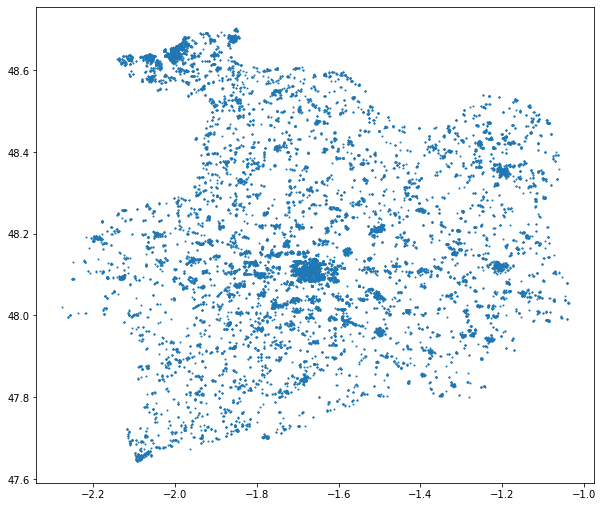

In [ ]:
# dataframe vers geodataframe
dvfok = gpd.GeoDataFrame(dvf , geometry = gpd.points_from_xy(dvf['longitude'], dvf['latitude'])) 
dvfok.plot( figsize = ( 10 , 12 ) , markersize = 1 )

In [ ]:
## DVF
# il faut affecter un CRS
dvfok = dvfok.set_crs("EPSG:4326")

# Modifier le SCR
dvfok = dvfok.to_crs(2154)
dvfok.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# On affecte un ID à la DVF
dvfok["ID_dvf"] = dvfok.index
dvfok.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,min_valeur_fonciere_gcl,max_valeur_fonciere_gcl,geometry,ID_dvf
0,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,11,NaN,28.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,2,4.0,Local industriel. commercial ou assimilé,65.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non,non,POINT (345200.278 6793882.328),0
1,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non,non,POINT (345200.278 6793882.328),1
2,2020-101201,2020-01-06,1,Vente,360000.0,2.0,B,AV CHARLES LE GOFFIC,0060,35740.0,35210,Pacé,35,NaN,NaN,35210000BE0389,NaN,NaN,29,56.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,61.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.773629,48.148755,non,non,POINT (345200.278 6793882.328),2
3,2020-101202,2020-01-06,1,Vente,100000.0,6.0,NaN,SQ MARCEL BOZZUFFI,6217,35000.0,35238,Rennes,35,NaN,NaN,35238000KO0295,NaN,NaN,2541,42.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,42.0,2.0,NaN,NaN,NaN,NaN,NaN,-1.642170,48.098299,non,non,POINT (354630.086 6787702.229),3
4,2020-101202,2020-01-06,1,Vente,100000.0,6.0,NaN,SQ MARCEL BOZZUFFI,6217,35000.0,35238,Rennes,35,NaN,NaN,35238000KO0295,NaN,NaN,2520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.642170,48.098299,non,non,POINT (354630.086 6787702.229),4


In [ ]:
# Jointure de la dvf aux parcelles
dvf_parcelles = gpd.sjoin(ParcellesOK, dvfok, how = 'left', op='intersects')
dvf_parcelles.head()

,ID_PARCELLE,CODE_COMMUNE,prefixe,section,NUMERO,SURFACE_PARCELLE,created,MISE_A_JOUR,geometry,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,index_right,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,min_valeur_fonciere_gcl,max_valeur_fonciere_gcl,ID_dvf
0,35238000AB0313,35238,000,AB,313,16380,2002-06-17,2019-12-13,"POLYGON ((352018.583 6789835.134, 351983.507 6...",16315.901167,64.098833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35238000AB0297,35238,000,AB,297,13690,2002-06-17,2019-12-13,"POLYGON ((352092.401 6790175.755, 352094.140 6...",13664.490621,25.509379,2614.0,2020-102483,2020-04-09,1.0,Vente,330000.0,4.0,B,RUE SAINT MARTIN,8750,35700.0,35238.0,Rennes,35.0,NaN,NaN,35238000AB0297,NaN,NaN,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-1.677363,48.119721,non,non,2614.0
1,35238000AB0297,35238,000,AB,297,13690,2002-06-17,2019-12-13,"POLYGON ((352092.401 6790175.755, 352094.140 6...",13664.490621,25.509379,2613.0,2020-102483,2020-04-09,1.0,Vente,330000.0,4.0,B,RUE SAINT MARTIN,8750,35700.0,35238.0,Rennes,35.0,NaN,NaN,35238000AB0297,NaN,NaN,11,77.94,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Appartement,78.0,3.0,NaN,NaN,NaN,NaN,NaN,-1.677363,48.119721,non,non,2613.0
2,35238000AB0296,35238,000,AB,296,9430,2002-06-17,2019-12-13,"POLYGON ((352223.378 6790285.603, 352222.272 6...",9406.880964,23.119036,2960.0,2020-102683,2020-05-25,1.0,Vente,250000.0,8.0,NaN,PARC SAINT MARTIN,B744,35700.0,35238.0,Rennes,35.0,NaN,NaN,35238000AB0296,NaN,NaN,174,NaN,54.0,81.9,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,Appartement,85.0,4.0,NaN,NaN,NaN,NaN,NaN,-1.676403,48.120817,non,non,2960.0
3,35238000AB0834,35238,000,AB,834,5556,2002-06-17,2019-12-13,"POLYGON ((351930.377 6790271.634, 351934.658 6...",5526.591630,29.408370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Supprimer index_right + renommer
dvf_parcelles = dvf_parcelles[["ID_PARCELLE", "CODE_COMMUNE", "NUMERO", "SURFACE_PARCELLE", "MISE_A_JOUR", "SURFACE_PARCELLE_gcl", "geometry", "SOUSTRACTION_SURFACE_gcl", "valeur_fonciere", "type_local", "longitude", "latitude", "ID_dvf"]]
dvf_parcelles = dvf_parcelles.rename(columns={'id':'ID_parcelle', 'longitude':'Longitude_dvf', 'latitude':'Latitude_dvf'})
dvf_parcelles.head()

,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,MISE_A_JOUR,SURFACE_PARCELLE_gcl,geometry,SOUSTRACTION_SURFACE_gcl,valeur_fonciere,type_local,Longitude_dvf,Latitude_dvf,ID_dvf
0,35238000AB0313,35238,313,16380,2019-12-13,16315.901167,"POLYGON ((352018.583 6789835.134, 351983.507 6...",64.098833,NaN,NaN,NaN,NaN,NaN
1,35238000AB0297,35238,297,13690,2019-12-13,13664.490621,"POLYGON ((352092.401 6790175.755, 352094.140 6...",25.509379,330000.0,Dépendance,-1.677363,48.119721,2614.0
1,35238000AB0297,35238,297,13690,2019-12-13,13664.490621,"POLYGON ((352092.401 6790175.755, 352094.140 6...",25.509379,330000.0,Appartement,-1.677363,48.119721,2613.0
2,35238000AB0296,35238,296,9430,2019-12-13,9406.880964,"POLYGON ((352223.378 6790285.603, 352222.272 6...",23.119036,250000.0,Appartement,-1.676403,48.120817,2960.0
3,35238000AB0834,35238,834,5556,2019-12-13,5526.591630,"POLYGON ((351930.377 6790271.634, 351934.658 6...",29.408370,NaN,NaN,NaN,NaN,NaN


In [ ]:
# jointure des batiments aux parcelles + dvf
Basebati = gpd.sjoin(BaseBati, dvf_parcelles, how = 'left', op='intersects')
Basebati.head(2)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGTS,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MAX_SOL,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,Surface_batiment,ID_PARCELLE_left,CODE_COMMUNE_left,NUMERO_left,SURFACE_PARCELLE_left,SURFACE_PARCELLE_gcl_left,SOUSTRACTION_SURFACE_gcl_left,SD_batiment_gcl,geometry,propbatiparcelle,Usages_Complet_gcl,Surface_plancher_gcl,index_right,ID_PARCELLE_right,CODE_COMMUNE_right,NUMERO_right,SURFACE_PARCELLE_right,MISE_A_JOUR,SURFACE_PARCELLE_gcl_right,SOUSTRACTION_SURFACE_gcl_right,valeur_fonciere,type_local,Longitude_dvf,Latitude_dvf,ID_dvf
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.9,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.9,8286,35238000BC0404,35238,404,145,2019-12-13,145.143351,-0.143351,NaN,NaN,NaN,NaN,NaN
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.9,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.9,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN


In [ ]:
Basebati = Basebati.rename(columns={'NB_LOGTS': 'NB_LOGEMENT','Z_MIN_SOL': 'ALTITUDE_MIN', 'Z_MAX_SOL': 'ALTITUDE_MAX', 'min_nblogts': 'NBLOGEMENT_MIN_gcl', 'max_nblogts': 'NBLOGEMENT_MAX_gcl', 'min_etage': 'ETAGE_MIN_gcl', 'max_etage': 'ETAGE_MAX_gcl', 'min_hauteur': 'HAUTEUR_MIN_gcl', 'max_hauteur': 'HAUTEUR_MAX_gcl', 'Surface_batiment': 'SURFACE_BATIMENT_gcl', 'Surface_parcelle': 'SURFACE_PARCELLE_gcl', 'soustraction_surface': 'SOUSTRACTION_SURFACE_gcl', 'SD_batiment': 'SD_BATIMENT_gcl', 'geometry': 'GEOMETRY', 'propbatiparcelle': 'PROPBATI_PARCELLE_gcl', 'Usages_Complet': 'USAGE_COMPLET_gcl', 'Surface_plancher_gcl': 'SURFACE_PLANCHER_gcl', 'ID_parcelle': 'ID_PARCELLE', 'contenance_right': 'CONTENANCE_PARCELLE', 'valeur_fonciere': 'PRIX', 'type_local': 'TYPE', 'ID_dvf': 'ID_DVF_gcl', 'longitude': 'LONGITUDE', 'latitude': 'LATITUDE'})
Basebati.head()


,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE_left,CODE_COMMUNE_left,NUMERO_left,SURFACE_PARCELLE_left,SURFACE_PARCELLE_gcl_left,SOUSTRACTION_SURFACE_gcl_left,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,index_right,ID_PARCELLE_right,CODE_COMMUNE_right,NUMERO_right,SURFACE_PARCELLE_right,MISE_A_JOUR,SURFACE_PARCELLE_gcl_right,SOUSTRACTION_SURFACE_gcl_right,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,8286,35238000BC0404,35238,404,145,2019-12-13,145.143351,-0.143351,NaN,NaN,NaN,NaN,NaN
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.26,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None,142.82,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115,Annexe/None,18.90,8286,35238000BC0404,35238,404,145,2019-12-13,145.143351,-0.143351,NaN,NaN,NaN,NaN,NaN


# **Calculs base bâti**

##**Hauteur/etage**

In [ ]:
#Nouveau champ étage
Basebati["etage_gcl"] = (Basebati["HAUTEUR"]).divide(3)
Basebati["etage_gcl"] = (Basebati["etage_gcl"]).round()
Basebati["etage_gcl"] = (Basebati["etage_gcl"]).astype('Int64')

Basebati.head(2)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE_left,CODE_COMMUNE_left,NUMERO_left,SURFACE_PARCELLE_left,SURFACE_PARCELLE_gcl_left,SOUSTRACTION_SURFACE_gcl_left,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,index_right,ID_PARCELLE_right,CODE_COMMUNE_right,NUMERO_right,SURFACE_PARCELLE_right,MISE_A_JOUR,SURFACE_PARCELLE_gcl_right,SOUSTRACTION_SURFACE_gcl_right,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.9,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.9,8286,35238000BC0404,35238,404,145,2019-12-13,145.143351,-0.143351,NaN,NaN,NaN,NaN,NaN,1
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.9,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.9,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN,1


**Remplacer les valeurs nulles des etages par le calcul**

In [ ]:
Basebati["ETAGE_COMPLET_gcl"] = Basebati["NB_ETAGES"].replace(np.nan,-100)
Basebati.head()

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE_left,CODE_COMMUNE_left,NUMERO_left,SURFACE_PARCELLE_left,SURFACE_PARCELLE_gcl_left,SOUSTRACTION_SURFACE_gcl_left,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,index_right,ID_PARCELLE_right,CODE_COMMUNE_right,NUMERO_right,SURFACE_PARCELLE_right,MISE_A_JOUR,SURFACE_PARCELLE_gcl_right,SOUSTRACTION_SURFACE_gcl_right,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl,ETAGE_COMPLET_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,8286,35238000BC0404,35238,404,145,2019-12-13,145.143351,-0.143351,NaN,NaN,NaN,NaN,NaN,1,1
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN,1,1
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.26,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN,1,1
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None,142.82,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN,2,2
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115,Annexe/None,18.90,8286,35238000BC0404,35238,404,145,2019-12-13,145.143351,-0.143351,NaN,NaN,NaN,NaN,NaN,1,1


In [ ]:
def etage(Basebati): 
  if Basebati['ETAGE_COMPLET_gcl'] == -100: 
    return Basebati['etage_gcl']
  else: 
    return Basebati['ETAGE_COMPLET_gcl']

Basebati['ETAGE_COMPLET_gcl'] = Basebati.apply(etage, axis=1)

In [ ]:
Basebati.head(2)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE_left,CODE_COMMUNE_left,NUMERO_left,SURFACE_PARCELLE_left,SURFACE_PARCELLE_gcl_left,SOUSTRACTION_SURFACE_gcl_left,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,index_right,ID_PARCELLE_right,CODE_COMMUNE_right,NUMERO_right,SURFACE_PARCELLE_right,MISE_A_JOUR,SURFACE_PARCELLE_gcl_right,SOUSTRACTION_SURFACE_gcl_right,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl,ETAGE_COMPLET_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.9,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.9,8286,35238000BC0404,35238,404,145,2019-12-13,145.143351,-0.143351,NaN,NaN,NaN,NaN,NaN,1,1
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.9,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.9,8285,35238000BC0403,35238,403,184,2019-12-13,186.031075,-2.031075,NaN,NaN,NaN,NaN,NaN,1,1


##**Nettoyer la couche**

In [ ]:
# Supprimer index_right + renommer
Basebati = Basebati[["ID_bati", "NATURE", "USAGE1", "USAGE2", "NB_LOGEMENT", "NB_ETAGES", "MAT_MURS", "MAT_TOITS", "HAUTEUR", "ALTITUDE_MIN", "ALTITUDE_MAX", "min_nblogts_gcl", "max_nblogts_gcl", "min_etage_gcl", "max_etage_gcl", "min_hauteur_gcl", "max_hauteur_gcl", "SURFACE_BATIMENT_gcl", "ID_PARCELLE_left", "CODE_COMMUNE_left", "NUMERO_left", "SURFACE_PARCELLE_left", "SURFACE_PARCELLE_gcl_left", "SOUSTRACTION_SURFACE_gcl_left", "SD_batiment_gcl", "GEOMETRY", "PROPBATI_PARCELLE_gcl", "Usages_Complet_gcl", "SURFACE_PLANCHER_gcl", "PRIX", "TYPE", "Longitude_dvf", "Latitude_dvf", "ID_DVF_gcl", "etage_gcl", "ETAGE_COMPLET_gcl"]]
Basebati = Basebati.rename(columns={'ID_PARCELLE_left':'ID_PARCELLE', 'CODE_COMMUNE_left':'CODE_COMMUNE', 'NUMERO_left':'NUMERO', 'SURFACE_PARCELLE_left':'SURFACE_PARCELLE', 'SURFACE_PARCELLE_gcl_left':'SURFACE_PARCELLE_gcl', 'SOUSTRACTION_SURFACE_gcl_left':'SOUSTRACTION_SURFACE_gcl'})
Basebati.head()

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl,ETAGE_COMPLET_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.26,NaN,NaN,NaN,NaN,NaN,1,1
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None,142.82,NaN,NaN,NaN,NaN,NaN,2,2
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1


##**On remet la couche en geodataframe**

In [ ]:
BasebatiGEO = gpd.GeoDataFrame(Basebati, crs="EPSG:2154", geometry='GEOMETRY')

**Statistiques sur le nombre de bâtiments en fonction de leur nombre d'étages**

In [ ]:
Etage = Basebati[["ETAGE_COMPLET_gcl", "ID_bati"]].groupby("ETAGE_COMPLET_gcl").count() 
Etage.head()

,ID_bati
ETAGE_COMPLET_gcl,
0,6418
1,4016
2,8621
3,1902
4,1565


#**Jointure spatiale quartiers prioritaires avec la base bati**

##Base quartiers prioritaires

In [ ]:
# Buffer de 0m pour corriger les géométries incorrectes sur la couche des quartiers prioritaires
QUARTIER_PRIO_1 = QUARTIER_PRIO.copy() 
QUARTIER_PRIO_1['geometry'] = QUARTIER_PRIO_1.geometry.buffer(0) 
QUARTIER_PRIO_1.head(2)

,CODE_QP,NOM_QP,COMMUNE_QP,geometry
0,QP044012,Le Ranzay,Nantes,"POLYGON ((357455.157 6692832.812, 357455.351 6..."
1,QP033010,Grand-Parc,Bordeaux,"POLYGON ((416890.442 6423848.428, 416894.521 6..."


In [ ]:
Basebati = gpd.sjoin(BasebatiGEO, QUARTIER_PRIO_1, how= 'left', op='intersects')
Basebati.head(3)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl,ETAGE_COMPLET_gcl,index_right,CODE_QP,NOM_QP,COMMUNE_QP
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.26,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN


**remplacer les valeurs nulles pour les quartiers prioritaires**

In [ ]:
Basebati["CODE_QP"] = Basebati["CODE_QP"].replace(np.nan,0 )

In [ ]:
Basebati.head()

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl,ETAGE_COMPLET_gcl,index_right,CODE_QP,NOM_QP,COMMUNE_QP
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.26,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None,142.82,NaN,NaN,NaN,NaN,NaN,2,2,NaN,0,NaN,NaN
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN


**Création d'un champ QUARTIER_PRIO_gcl pour savoir si le bâtiment est dans un quartier prioritaire**

In [ ]:
# Creation d'un champ égal à 0
Basebati['QUARTIER_PRIO_gcl'] = 0

# Quand valeur égale à 0 (valeur null de départ), on écrit non (bâtiment pas dans un quartier prioritaire), sinon oui
for row, value in Basebati["CODE_QP"].items(): 
  if value == 0: 
    Basebati["QUARTIER_PRIO_gcl"][row] = 'non' 
  else: 
    Basebati["QUARTIER_PRIO_gcl"][row] = 'oui' 

Basebati.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl,ETAGE_COMPLET_gcl,index_right,CODE_QP,NOM_QP,COMMUNE_QP,QUARTIER_PRIO_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.26,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.26,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.41,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None,142.82,NaN,NaN,NaN,NaN,NaN,2,2,NaN,0,NaN,NaN,non
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.90,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115,Annexe/None,18.90,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non


#Affichage

In [ ]:
Basebati.head(30)

,ID_bati,NATURE,USAGE1,USAGE2,NB_LOGEMENT,NB_ETAGES,MAT_MURS,MAT_TOITS,HAUTEUR,ALTITUDE_MIN,ALTITUDE_MAX,min_nblogts_gcl,max_nblogts_gcl,min_etage_gcl,max_etage_gcl,min_hauteur_gcl,max_hauteur_gcl,SURFACE_BATIMENT_gcl,ID_PARCELLE,CODE_COMMUNE,NUMERO,SURFACE_PARCELLE,SURFACE_PARCELLE_gcl,SOUSTRACTION_SURFACE_gcl,SD_batiment_gcl,GEOMETRY,PROPBATI_PARCELLE_gcl,Usages_Complet_gcl,SURFACE_PLANCHER_gcl,PRIX,TYPE,Longitude_dvf,Latitude_dvf,ID_DVF_gcl,etage_gcl,ETAGE_COMPLET_gcl,index_right,CODE_QP,NOM_QP,COMMUNE_QP,QUARTIER_PRIO_gcl
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.900,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
0,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0403,35238,403,184,186.031075,-2.031075,9.727258,"POLYGON Z ((352849.421 6790619.554 41.200, 352...",5.228835,Annexe/None,18.900,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
1,BATIMENT0000000297126674,Indifférenciée,Annexe,None,0,1,None,None,2.6,38.3,41.4,oui,non,non,non,non,non,16.260,35238000BC0403,35238,403,184,186.031075,-2.031075,13.847063,"POLYGON Z ((352849.779 6790620.177 41.000, 352...",7.443414,Annexe/None,16.260,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
2,BATIMENT0000000297126675,Indifférenciée,Résidentiel,None,1,2,50,10,5.8,37.5,39.6,non,non,non,non,non,non,71.410,35238000BC0403,35238,403,184,186.031075,-2.031075,59.870771,"POLYGON Z ((352861.700 6790630.400 43.300, 352...",32.183210,Résidentiel/None,142.820,NaN,NaN,NaN,NaN,NaN,2,2,NaN,0,NaN,NaN,non
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115,Annexe/None,18.900,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
3,BATIMENT0000000297126673,Indifférenciée,Annexe,None,0,1,04,09,2.7,38.5,42.0,oui,non,non,non,non,non,18.900,35238000BC0404,35238,404,145,145.143351,-0.143351,6.367605,"POLYGON Z ((352848.549 6790618.035 41.200, 352...",4.387115,Annexe/None,18.900,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,NaN,non
4,BATIMENT0000000297126960,Indifférenciée,Indifférencié,None,0,0,None,None,4.3,38.9,42.0,oui,non,oui,non,non,non,7.475,35238000BC0404,35238,404,145,145.143351,-0.143351,7.360805,"POLYGON Z ((352857.618 6790609.816 43.200, 352...",5.071404,Indifférencié/None,0.000,NaN,NaN,NaN,NaN,NaN,1,0,NaN,0,NaN,NaN,non
4,BATIMENT0000000297126960,Indifférenciée,Indifférencié,None,0,0,None,None,4.3,38.9,42.0,oui,non,oui,non,non,non,7.475,35238000BC0404,35238,404,145,145.143351,-0.143351,7.360805,"POLYGON Z ((352857.618 6790609.816 43.200, 352...",5.071404,Indifférencié/None,0.000,NaN,NaN,NaN,NaN,NaN,1,0,NaN,0,NaN,NaN,non
4,BATIMENT0000000297126960,Indifférenciée,Indifférencié,None,0,0,None,None,4.3,38.9,42.0,oui,non,oui,non,non,non,7.475,35238000BC0404,35238,404,145,145.143351,-0.143351,7.360805,"POLYGON Z ((352857.618 6790609.816 43.200, 352...",5.071404,Indifférencié/None,0.000,NaN,NaN,NaN,NaN,NaN,1,0,NaN,0,NaN,NaN,non
5,BATIMENT0000000297126639,Indifférenciée,Résidentiel,None,1,2,40,20,5.3,37.9,38.7,non,non,non,non,non,non,55.440,35238000BC0404,35238,404,145,145.143351,-0.143351,0.041790,"POLYGON Z ((352868.369 6790629.764 43.200, 352...",0.028792,Résidentiel/None,110.880,NaN,NaN,NaN,NaN,NaN,2,2,NaN,0,NaN,NaN,non


In [ ]:
Categorie = Basebati[["QUARTIER_PRIO_gcl", "ID_bati"]].groupby("QUARTIER_PRIO_gcl").count() 
Categorie.head()

,ID_bati
QUARTIER_PRIO_gcl,
non,22267
oui,2586


**On écrit la base batiment en geojson**

In [ ]:
Basebati.to_file("base_bati.geojson", driver='GeoJSON')

# OSM

Téléchargement de la couche

In [ ]:
import requests

import pandas as pd

import geopandas as gp

from shapely.geometry import Point

 

def get_overpass_gdf(query_string):

 

    # Retrieve URL contents

    r = requests.get(query_string)

 

    # Make dataframe

    df = pd.DataFrame(r.json()['elements'])

 

   # Make geodataframe

    df['geometry'] = [Point(xy) for xy in zip(df.lon, df.lat)]

    df = gp.GeoDataFrame(df, geometry='geometry')

 

    return df

 

# Specify query

query_string = 'http://overpass-api.de/api/interpreter?data=[out:json][timeout:250];area(3600007465)->.searchArea;(node["emergency"="yes"](area.searchArea);node["emergency"="fire_hydrant"](area.searchArea););out meta;>;out meta;'

 

# Export to GeoJSON

OSM = get_overpass_gdf(query_string)

OSM.to_file("OSM", driver="GeoJSON")

In [ ]:
OSM.head(4)

,type,id,lat,lon,timestamp,version,changeset,user,uid,tags,geometry
0,node,613413244,47.828634,-1.315246,2019-01-21T08:07:22Z,5,66495767,MacDony,3701940,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.31525 47.82863)
1,node,684310902,48.008364,-1.773675,2015-07-02T00:10:32Z,11,32344045,geodreieck4711,479256,{'emergency': 'fire_hydrant'},POINT (-1.77367 48.00836)
2,node,693247187,47.999674,-1.778746,2015-07-02T00:10:33Z,9,32344045,geodreieck4711,479256,{'emergency': 'fire_hydrant'},POINT (-1.77875 47.99967)
3,node,693247189,48.001983,-1.774999,2018-09-14T16:21:49Z,10,62587537,PanierAvide,214436,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.77500 48.00198)


In [ ]:
OSM.set_crs(epsg=4326, inplace=True)

,type,id,lat,lon,timestamp,version,changeset,user,uid,tags,geometry
0,node,613413244,47.828634,-1.315246,2019-01-21T08:07:22Z,5,66495767,MacDony,3701940,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.31525 47.82863)
1,node,684310902,48.008364,-1.773675,2015-07-02T00:10:32Z,11,32344045,geodreieck4711,479256,{'emergency': 'fire_hydrant'},POINT (-1.77367 48.00836)
2,node,693247187,47.999674,-1.778746,2015-07-02T00:10:33Z,9,32344045,geodreieck4711,479256,{'emergency': 'fire_hydrant'},POINT (-1.77875 47.99967)
3,node,693247189,48.001983,-1.774999,2018-09-14T16:21:49Z,10,62587537,PanierAvide,214436,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.77500 48.00198)
4,node,693247196,48.006890,-1.774316,2019-05-01T13:20:58Z,12,69764594,Maxime Lorant,1836105,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.77432 48.00689)
...,...,...,...,...,...,...,...,...,...,...,...
2493,node,8569834299,48.644481,-1.982176,2021-03-28T19:49:44Z,1,101887564,Carto75,12194125,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.98218 48.64448)
2494,node,8572138010,48.199760,-1.597674,2021-03-29T15:37:22Z,1,101926874,Carto75,12194125,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.59767 48.19976)
2495,node,8572933645,48.139067,-1.619119,2021-03-29T20:43:21Z,1,101939917,Maxime Lorant,1836105,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.61912 48.13907)
2496,node,8572933646,48.141887,-1.618941,2021-03-29T20:43:21Z,1,101939917,Maxime Lorant,1836105,"{'emergency': 'fire_hydrant', 'fire_hydrant:ty...",POINT (-1.61894 48.14189)
